1.**[40 points] Linear Classifiers (logistic regression and GDA)**

(a) We have known from lecture that:
\begin{equation*}
\frac{\partial J(\theta)}{\partial \theta_j} = -\frac{1}{m}\sum_{i=1}^{m}{(y^{(i)}-h_\theta(x^{(i)}))}x^{(i)}_j \\
\end{equation*}
Then
\begin{align*}
\frac{\partial^2 J(\theta)}{\partial \theta_j \partial \theta_k} &= \frac{1}{m}\sum_{i=1}^{m} x^{(i)}_j \frac{\partial h_\theta(x^{(i)})}{\partial \theta_k} \\
                                                                 &= \frac{1}{m}\sum_{i=1}^{m} x^{(i)}_j \frac{\partial g(\theta^Tx^{(i)})}{\partial \theta_k} \\
                                                                 &= \frac{1}{m}\sum_{i=1}^{m} x^{(i)}_j g(\theta^Tx^{(i)}) \left[ 1-g(\theta^Tx^{(i)})\right] x^{(i)}_k \\
                                                                 &= \frac{1}{m}\sum_{i=1}^{m} h_\theta(x^{(i)}) \left[ 1-h_\theta(x^{(i)})\right] x^{(i)}_j x^{(i)}_k \\
\end{align*}
Therefore, the Hessian $H=\frac{1}{m}\sum_{i=1}^{m} h_\theta(x^{(i)}) \left[ 1-h_\theta(x^{(i)})\right] x^{(i)} {x^{(i)}}^T$. 

For any vector $z$, 
\begin{align*}
  z^THz &= z^T \frac{1}{m}\sum_{i=1}^{m} h_\theta(x^{(i)}) \left[ 1-h_\theta(x^{(i)})\right] x^{(i)} {x^{(i)}}^T z \\
        &= \frac{1}{m}\sum_{i=1}^{m} \sum_{j} \sum_{k} h_\theta(x^{(i)}) \left[ 1-h_\theta(x^{(i)})\right] z_j x^{(i)}_j x^{(i)}_k z_k \\
        &= \frac{1}{m}\sum_{i=1}^{m} h_\theta(x^{(i)}) \left[ 1-h_\theta(x^{(i)})\right] ({x^{(i)}}^Tz)^2 \\
        &\ge 0
\end{align*}
so it holds that $z^Hz\ge0$.

(b)

In [40]:
import numpy as np
import src.util as util
import matplotlib.pyplot as plt
from src.linear_model import LinearModel

Define class:

In [41]:

class LogisticRegression(LinearModel):
    """Logistic regression with Newton's Method as the solver.

    Example usage:
        > clf = LogisticRegression()
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """

    def h(self,theta,x):
        return 1/(1+np.exp(-x @ theta))

    def fit(self, x, y):
        """Run Newton's Method to minimize J(theta) for logistic regression.

        Args:
            x: Training example inputs. Shape (m, n).
            y: Training example labels. Shape (m,).
        """
        # *** START CODE HERE ***
        def H(theta):
            h_theta_x = np.reshape(self.h(theta,x),(-1,1))
            return 1/m * np.dot(x.T, (h_theta_x * (1-h_theta_x) * x))
        def fp(theta):
            return 1/m * x.T @ (self.h(theta,x)-y)

        
        m,n = x.shape
        theta = np.zeros(n)
        step = np.linalg.inv(H(theta))@fp(theta)
        while np.linalg.norm(step,1) > self.eps:
            theta = theta-step
            step = np.linalg.inv(H(theta))@fp(theta)
        self.theta = theta
        # *** END CODE HERE ***

    def predict(self, x):
        """Make a prediction given new inputs x.

        Args:
            x: Inputs of shape (m, n).

        Returns:
            Outputs of shape (m,).
        """
        # *** START CODE HERE ***
        # return self.h(self.theta,x) This is wrong!!!
        return x @ self.theta >= 0
        # *** END CODE HERE ***

Define `main` function

In [42]:

def main_logreg(train_path, eval_path, pred_path):
    """Problem 1(b): Logistic regression with Newton's Method.

    Args:
        train_path: Path to CSV file containing dataset for training.
        eval_path: Path to CSV file containing dataset for evaluation.
        pred_path: Path to save predictions.
    """
    x_train, y_train = util.load_dataset(train_path, add_intercept=True)

    # *** START CODE HERE ***

    # take a look
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.plot(x_train[y_train == 1, -2], x_train[y_train == 1, -1], 'bx', linewidth=2)
    plt.plot(x_train[y_train == 0, -2], x_train[y_train == 0, -1], 'go', linewidth=2)
    

    # train
    logreg.fit(x_train, y_train)
    y_train_pred = logreg.predict(x_train)

    # show the result for training set
    util.plot(x_train, y_train, theta=logreg.theta)
    plt.show()

    # show the result for validation set
    x_eval, y_eval = util.load_dataset(eval_path, add_intercept=True)
    util.plot(x_eval, y_eval, theta=logreg.theta)

    # *** END CODE HERE ***

Run

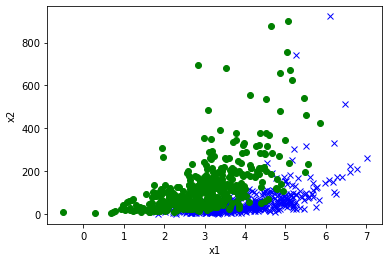

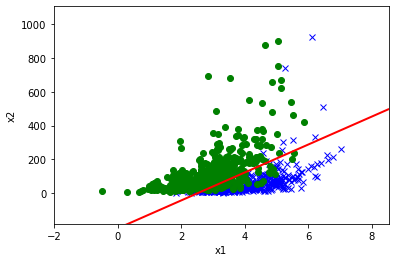

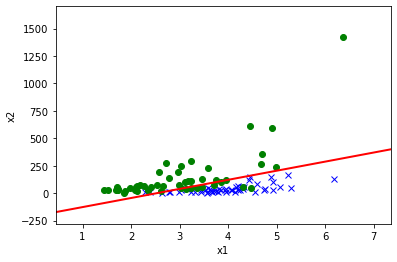

In [43]:
train_path='./data/ds1_train.csv'
eval_path='./data/ds1_valid.csv'
pred_path='./output/p01b_pred_1.txt'
logreg = LogisticRegression()
main_logreg(train_path,eval_path,pred_path)

(c)
Since 
\begin{align*}
p(y=1|x;\phi,\mu_0, \mu_1, \Sigma) &= \frac{p(x|y=1)p(y=1)}{p(x)} \\
                                   &= \frac{p(x|y=1)p(y=1)}{p(x|y=1)p(y=1)+p(x|y=0)p(y=0)}
\end{align*}
then we can write the posterior distribution as:
\begin{align*}
p(y=1|x;\phi,\mu_0, \mu_1, \Sigma) &= \frac{p(x|y=1)p(y=1)}{p(x|y=1)p(y=1)+p(x|y=0)p(y=0)}\\
                                   &= \frac{\phi \exp{\left\{ -\frac{1}{2}(x-\mu_1)^T\Sigma^{-1}(x-\mu_1)\right\}}}{\phi \exp{\left\{ -\frac{1}{2}(x-\mu_1)^T\Sigma^{-1}(x-\mu_1)\right\}}+(1-\phi) \exp{\left\{ -\frac{1}{2}(x-\mu_0)^T\Sigma^{-1}(x-\mu_0)\right\}}} \\
                                   &= \frac{1}{1+\frac{1-\phi}{\phi} \exp{\left\{ -\frac{1}{2}(x-\mu_0)^T\Sigma^{-1}(x-\mu_0)+\frac{1}{2}(x-\mu_1)^T\Sigma^{-1}(x-\mu_1)\right\}}} \\
                                   &= \frac{1}{1+\frac{1-\phi}{\phi} \exp{\left\{  \mu_0^T \Sigma^{-1}x-\mu_1^T\Sigma^{-1}x+\frac{1}{2}\mu_1^T\Sigma^{-1}\mu_1-\frac{1}{2}\mu_0^T\Sigma^{-1}\mu_0 \right\}}} \\
                                   &= \frac{1}{1+\exp{(-(\theta^Tx+\theta_0))}}
\end{align*}
with 
$$
\left\{  
  \begin{aligned}
    & \theta^T = (\mu_1-\mu_0)^T\Sigma^{-1} \\
    & \theta_0 = \log{\phi}-\log{(1-\phi)}+\frac{1}{2}\mu_0^T\Sigma^{-1}\mu_0-\frac{1}{2}\mu_1^T\Sigma^{-1}\mu_1
  \end{aligned}  
\right. 
$$

(d)
\begin{align*}
l(\phi,\mu_0,\mu_1,\Sigma) &= \log {\prod_{i=1}^{m} p(x^{(i)},y^{(i)};\phi, \mu_0, \mu_1, \Sigma)} \\
                           &= \log {\prod_{i=1}^{m} p(x^{(i)} | y^{(i)};\mu_0, \mu_1, \Sigma)}p(y^{(i)};\phi) \\
                           &= \sum_{i=1}^{m} \left\{ \log { \left[ (x^{(i)} | y^{(i)};\mu_0, \mu_1, \Sigma)\right]}+ \log {p(y^{(i)};\phi)}\right\} 
\end{align*}

First, we take partial derivative for $\phi$:
\begin{equation*}
\frac{\partial l}{\partial \phi} = \sum_{i=1}^{m} \left[ \frac{y^{(i)}}{\phi} + \frac{y^{(i)}-1}{1-\phi} \right] = \sum_{i=1}^{m} \frac{y^{(i)}-\phi}{\phi(1-\phi)} = 0 \ \Longleftrightarrow \ \phi = \frac{1}{m}\sum_{i=1}^{m} y^{(i)}
\end{equation*}
Second, we consider the partial derivative for $\mu_0$ and $\mu_1$. We first consider $p(x|y=i) = \frac{1}{(2\pi)^{n/2}|\Sigma|^{1/2}}\exp {(-\frac{1}{2}(x-\mu_i)^T\Sigma^{-1}(x-\mu_i))}$ for $i=0,1$:
\begin{align*}
\frac{\partial \log {p(x|y=i)}}{\partial \mu_i} &= \frac{\partial (-\frac{1}{2}(x-\mu_i)^T\Sigma^{-1}(x-\mu_i))}{\partial \mu_i} \\
                                                &= \Sigma^{-1}(x-\mu_i)
\end{align*}
Then we have:
\begin{equation*}
  \frac{\partial l}{\partial \mu_0} = 0 \ \Longleftrightarrow \ \sum_{i=1}^m 1\left\{ y^{(i)}=0\right\}\Sigma^{-1}(x^{(i)}-\mu_0) = 0 \ \Longleftrightarrow \mu_0 = \frac{\sum_{i=1}^m 1\left\{ y^{(i)}=0\right\}x^{(i)}}{\sum_{i=1}^m 1\left\{ y^{(i)}=0\right\}}
\end{equation*}

(e)

Define class:

In [44]:
class GDA(LinearModel):
    """Gaussian Discriminant Analysis.

    Example usage:
        > clf = GDA()
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """

    def fit(self, x, y):
        """Fit a GDA model to training set given by x and y.

        Args:
            x: Training example inputs. Shape (m, n).
            y: Training example labels. Shape (m,).

        Returns:
            theta: GDA model parameters.
        """
        # *** START CODE HERE ***
        m,n = x.shape
        y = np.reshape(y, (-1,1))
        phi = 1/m*np.sum(y)
        mu_0 = x.T @ (1-y) / np.sum(1-y)
        mu_1 = x.T @ y / np.sum(y)
        mu_i = (1-y)@mu_0.T + y@mu_1.T
        Sigma = 1/m * (x-mu_i).T @ (x-mu_i)

        Sigma_inv = np.linalg.inv(Sigma)
        theta =  Sigma_inv @ (mu_1-mu_0)
        theta_0 = np.log(phi / (1-phi)) + 1/2*mu_0.T @ Sigma_inv @ mu_0 - 1/2*mu_1.T @ Sigma_inv @ mu_1
        theta = theta.reshape(-1,1)
        self.theta = np.insert(theta,0,theta_0)
        
        # *** END CODE HERE ***

    def predict(self, x):
        """Make a prediction given new inputs x.

        Args:
            x: Inputs of shape (m, n).

        Returns:
            Outputs of shape (m,).
        """
        # *** START CODE HERE ***
        return util.add_intercept(x) @ self.theta >= 0
        # *** END CODE HERE

Define `main` function:

In [45]:
def main_gda(train_path, eval_path, pred_path):
    """Problem 1(e): Gaussian discriminant analysis (GDA)

    Args:
        train_path: Path to CSV file containing dataset for training.
        eval_path: Path to CSV file containing dataset for evaluation.
        pred_path: Path to save predictions.
    """
    # Load dataset
    x_train, y_train = util.load_dataset(train_path, add_intercept=False)

    # *** START CODE HERE ***
    gda.fit(x_train, y_train)

    x_eval, y_eval = util.load_dataset(eval_path, add_intercept=False)
    util.plot2(x_eval, y_eval,theta_1=logreg.theta,legend_1="Logistic Regression",theta_2=gda.theta,legend_2="GDA")

    # *** END CODE HERE ***

Run

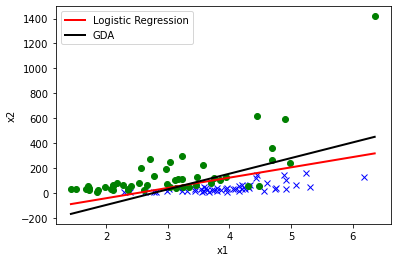

In [46]:
train_path='./data/ds1_train.csv'
eval_path='./data/ds1_valid.csv'
pred_path='./output/p01b_pred_1.txt'
gda = GDA()
main_gda(train_path,eval_path,pred_path)

(f)


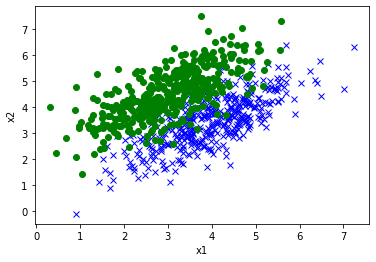

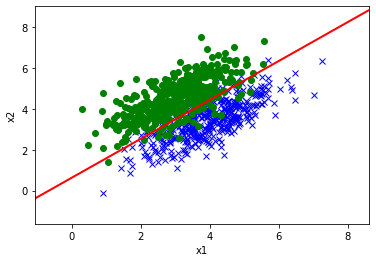

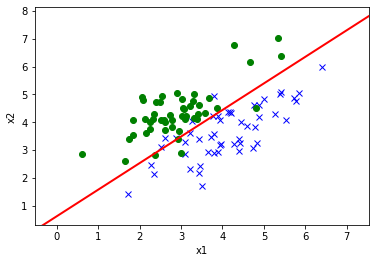

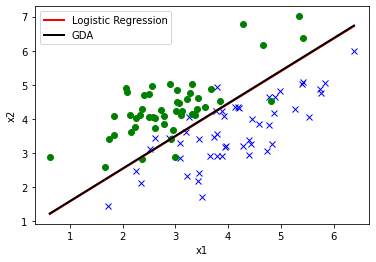

In [47]:
train_path='./data/ds2_train.csv'
eval_path='./data/ds2_valid.csv'
pred_path='./output/p01b_pred_2.txt'
main_logreg(train_path, eval_path, pred_path)
main_gda(train_path,eval_path,pred_path)

(g)
On dataset 1, GDA seems to perform worse than logistic regression, because for dataset 1, $p(x|y)$ is not a Gaussian distribution.